## **EDA on Fifa 2019 Data**

Used kaggle dataset on fifa 19 data(uploaded the file to google drive)

**Mounting google drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**importing libraries**

In [48]:
import os
import gc
import time
import random
import math
from tqdm import tqdm
import warnings
import pandas as pd
import numpy as np

# For the plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from mlxtend.plotting import category_scatter
%matplotlib inline
sns.set_style("whitegrid")


import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import IPython.display as py_display
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


# **Reading the data**

In [5]:
data= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fifa_eda.csv')

In [6]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [8]:
data.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [9]:
data.shape

(18207, 18)

Checking fro duplicates in datset

In [10]:
data.duplicated().sum()

0

Removing Null values

In [11]:
data=data.dropna()
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17907 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17907 non-null  int64  
 1   Name                      17907 non-null  object 
 2   Age                       17907 non-null  int64  
 3   Nationality               17907 non-null  object 
 4   Overall                   17907 non-null  int64  
 5   Potential                 17907 non-null  int64  
 6   Club                      17907 non-null  object 
 7   Value                     17907 non-null  float64
 8   Wage                      17907 non-null  float64
 9   Preferred Foot            17907 non-null  object 
 10  International Reputation  17907 non-null  float64
 11  Skill Moves               17907 non-null  float64
 12  Position                  17907 non-null  object 
 13  Joined                    17907 non-null  int64  
 14  Contra

**Data after removing null values**

In [13]:
data.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

## **Checking the Categorical Varables**

In [14]:
data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [15]:
data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [16]:
club = data['Club'].value_counts().head(10)
club

FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
RC Celta                   33
Rayo Vallecano             33
Fortuna Düsseldorf         33
Valencia CF                33
CD Leganés                 33
Name: Club, dtype: int64

**Visualizing the the data based on the Wage using plots**

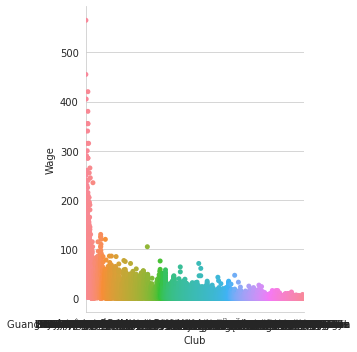

In [17]:
sns.catplot(x = 'Club', y = 'Wage', data = data)

**Plotting the Potential of the Players in each Club**

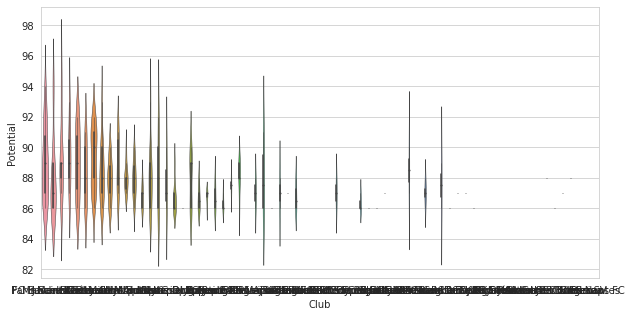

In [19]:
df1 =data[data['Potential']>85]
plt.figure(figsize = (10,5))
sns.violinplot(x = 'Club', y = 'Potential', data = df1, scale = 'count', linewidth = 0.5)

**Plotting the Values of the players based on potential**

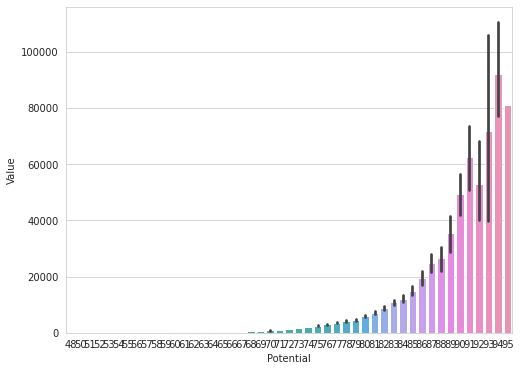

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Potential', y='Value')

**Wordcloud of the Names of Players**

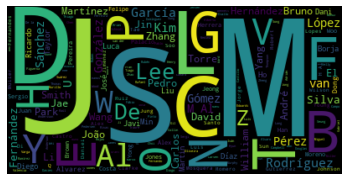

In [30]:
from wordcloud import WordCloud
text = " ".join(review for review in data.Name)
wordcloud = WordCloud(background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Using a Scatter plot to Visualize the value of clubs**

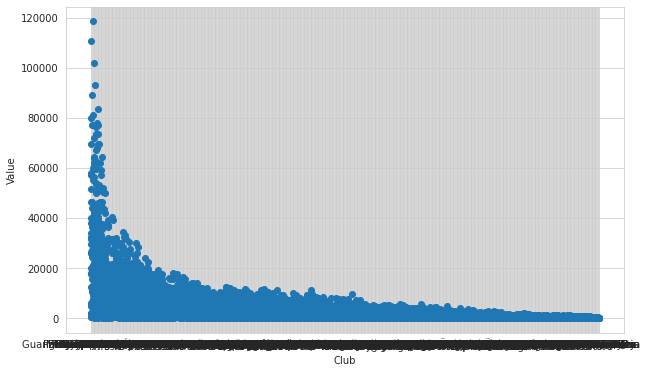

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Club'], data['Value'])
ax.set_xlabel('Club')
ax.set_ylabel('Value')
plt.show()

**Using D3 For Visualizations**

In [23]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 


In [41]:
from IPython.display import HTML
import IPython.display as dp
from string import Template

In [29]:
data.to_csv('fifa19.csv', index=False)

In [62]:
from string import Template
HTML('''
<html lang="en">
<head>
      <meta charset="UTF-8">
      <script src="https://d3js.org/d3.v7.min.js"></script>

      <title>D3 with DS4E</title>
      <style>
          .bar{
              fill: navy;
          }
      </style>
      <script>
   function main(){
  var svg = d3.select("svg"),
  margin = 200,
  width = svg.attr("width") - margin,
  height = svg.attr("height") - margin;
  var xscale = d3.scaleBand().range([0, width]).padding(0.4),
      yscale = d3.scaleLinear().range([height,0]);

  var g = svg.append("g").attr("transform", "translate("+100+","+100+")");
  d3.csv("/content/fifa19.csv").then(function(data){
      
      xscale.domain(data.map(function(d){return d.neighbourhood_group;}));
      console.log(xscale);
      yscale.domain([0,d3.max(data,function(d){return d.price;})]);
      g.append("g").attr('transform', 'translate(0,'+height+')')
          .call(d3.axisBottom(xscale))
      g.append("g").call(d3.axisLeft(yscale).tickFormat(function(d){
              return "$" + d;
      }).ticks(10));

      g.selectAll(".bar")
            .data(data)
            .enter().append("rect")
            .attr("class","bar")
            .attr("x",function(d){return xscale(d.neighbourhood_group);})
            .attr("y",function(d){return yscale(d.price);})
            .attr("width",xscale.bandwidth())
            .attr("height",function(d){return height - yscale(d.price);});
      });
    }



      </script>
</head>
<body onload="main();">
    <svg width=600 height=600></svg>


</body>
</html>
''')

The Above script is not reading data from the csv file tried using manual data added a button to change the data for the graph

In [66]:
from string import Template
HTML('''
<!DOCTYPE html>
<head>
  <meta charset="utf-8">
  <script src="https://d3js.org/d3.v4.min.js"></script>
</head>

<body>
  <div>
    <button id="btn" onclick="changeData()">Change Data</button>
  </div>

  <script>
    

    var width = 600;
    var height = 400;
    var datasets = [
        [10, 30, 40, 20],
        [10, 40, 30, 20, 50, 10],
        [60, 30, 40, 20, 30]
    ]
    
    var svg = d3.select("body").append("svg")
                .attr("width", width)
                .attr("height", height)
                .style("border", "1px solid black")

    function drawChart(data) {
        var selection = svg.selectAll("rect").data(data);
        var yScale = d3.scaleLinear()
                        .domain([0, d3.max(data)])
                        .range([0, height-100]);
    
        selection
            .transition().duration(300)
                .attr("height", (d) => yScale(d))
                .attr("y", (d) => height - yScale(d))

        selection
            .enter()
            .append("rect")
            .attr("x", (d, i) => i * 45)
            .attr("y", (d) => height)
            .attr("width", 40)
            .attr("height", 0)
            .attr("fill", "orange")
            .transition().duration(300)
                .attr("height", (d) => yScale(d))
                .attr("y", (d) => height - yScale(d))
        
        selection
            .exit()
            .transition().duration(300)
                .attr("y", (d) => height)
                .attr("height", 0)
            .remove()
    }

    var i = 0;
    function changeData(){
        drawChart(datasets[i++]);
        if(i == datasets.length) i = 0;
    }

    window.addEventListener('load', function() {
        changeData();
    });

  </script>
</body>
</html>''')